### Imports
---

In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from dataretrieval import nwis, utils, codes

### Inputs
---

In [49]:
STATE_CODE = 'ca'

### Data Retrieval
---

In [50]:
#Peak data for each site in CA (returns multi-level indexed df)
df = nwis.get_record(state_cd=STATE_CODE.lower(), service='peaks', start='1990-01-01')

#Reset the index as we don't want multi-level indexing for this
df = df.reset_index()
#df.to_csv('ca_peaks.csv')

### Peaks Heatmap<br>
---
<p>This heatmap shows the mean flow of all streamflow gauges peaking during a given month and year combination in the specified state</p>

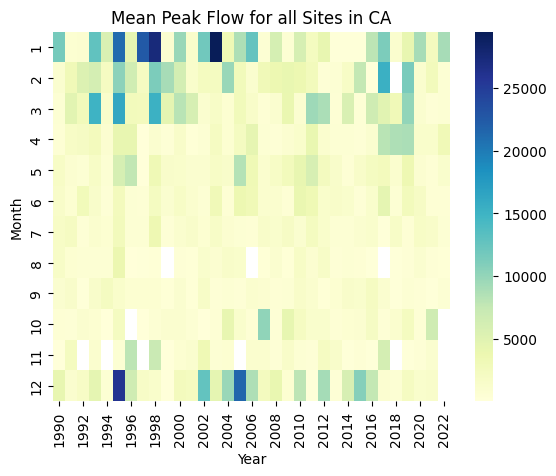

In [51]:
df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month

pivot_table = df.groupby(['Month', 'Year'])['peak_va'].mean().unstack()
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title(f'Mean Peak Flow for all Sites in {STATE_CODE.upper()}')
plt.show()